In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import keras
import cv2
from keras.models import Sequential
from keras.layers import Flatten,Dense,Conv2D,Reshape,Activation,InputLayer
from keras.applications import VGG16
dis=VGG16()
dis.trainable=False
dis.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

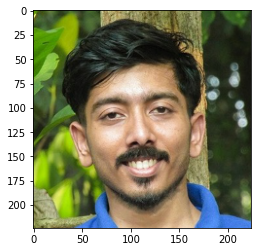

In [ ]:
im=plt.imread("/content/deepdream.jpg")
im=cv2.resize(im,(224,224))
im1=im.reshape((1,224,224,3))
im=im/255
im1=im1/255
plt.imshow(im)

In [ ]:
xx=np.ones((1,1))
gen=Sequential()
gen.add(Dense(150528, activation='linear',use_bias=False,input_shape=(1,) ))
gen.set_weights(im1.reshape(1,1,150528))
gen.add(Reshape((224, 224, 3)))

In [ ]:
mod=Sequential([gen,dis])
mod.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'])
a=np.zeros((1,1000))
a[0][1]=1
a[0][93]=0.5

In [ ]:
for qqq in range(1):
  mod.fit(x=xx,y=a,epochs=1000,verbose=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


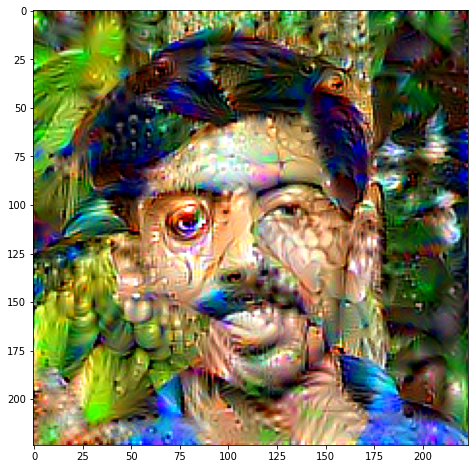

In [ ]:
pp=gen.predict(xx)
plt.figure(figsize=(8,8))
pp=pp.reshape(224,224,3)
plt.imshow(pp)